# <center> <font size = 24 color = 'steelblue'> **Classification -  Sentiment Analysis**

# <center> <img src = "https://drive.google.com/uc?export=view&id=16oN7Hn9yxnFnMrwGzTIzfMOELv4lNC-J" height = 500, width = 1000>

<div class="alert alert-block alert-info">
    
<font size = 4>

**By the end of this notebook you will be able to:**
- Learn to perform classification using transformers
- Understand fine-tuning and using a pre-trained models
    
    
</div>

# <a id= 'p0'>
<font size = 4>
    
**Table of Contents:**<br>
[1. Introduction](#p1)<br>
[2. Load the dataset](#p2)<br>
[3. Explore and prepare data](#p3)<br>
[4. Training the classifier](#p4)
> [4.1. Feature extraction](#p4.1)<br>
> [4.2. Extracting the last hidden states](#p4.2)<br>
> [4.3. Creating featurematrix](#p4.3)<br>
> [4.4. Visualizing the training set](#p4.4)<br>
> [4.5. Training a simple classifier](#p4.5)<br>

[5. Fine-tuning Transformers](#p5)<br>
[6. Loading a pre-trained model](#p6)<br>
    
> [6.1. Defining the performance metrics](#p6.1)<br>
> [6.2 Training the model](#p6.2)<br>   
    
[7. Error analysis](#p7)<br>
[8. Saving and sharing the model ](#p15)<br>

##### <a id = 'p1'>
    
<font size = 10 color = 'midnightblue'>  **Introduction**

<div class="alert alert-block alert-success">
<font size = 4>  
        
* The key benefit of this model is that it performs similarly to BERT but is much smaller and more efficient.<br>
* This means we can quickly train a classifier in just a few minutes. <br>
* If a preference is for a larger BERT model, transitioning to the checkpoint of the pre-trained model can be accomplished effortlessly.<br>
* A checkpoint refers to the set of weights loaded into a specific transformer architecture.

<font size = 5 color = 'seagreen'>

**A typical pipeline for training transformer models with the datasets, tokenizers, and  transformers libraries**

<img alt="Hugging Face Pipeline" caption="A typical pipeline for training transformer models with the image:images/logo.png[hf,13,13] Datasets, image:images/logo.png[hf,13,13] Tokenizers, and image:images/logo.png[hf,13,13] Transformers libraries" src="https://drive.google.com/uc?export=view&id=1NO06f76MUxksiH3Q9F2vpk5SNAGZtjQd" id="hf-libraries"/>

[top](#p0)

## <a id ='p2'>
<font size = 10 color = 'midnightblue'>  <b>The Dataset</b>

<div class="alert alert-block alert-success">

<font size =4>

* To create our emotion detector, utilize a valuable dataset from an article investigating how emotions manifest in english twitter messages.

*  Unlike typical sentiment analysis datasets that only involve "positive" and "negative" polarities, this dataset encompasses six fundamental emotions: **anger, disgust, fear, joy, sadness, and surprise**.

The objective is to train a model that, when given a tweet, can effectively classify it into one of these distinct emotions.

In [1]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.2 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


In [2]:
from datasets import list_datasets

all_datasets = list_datasets()
print(f"There are {len(all_datasets)} datasets currently available on the Hub")
print(f"The first 10 are: {all_datasets[:10]}")

<ipython-input-2-1ca6970f4f6e>:3: FutureWarning: list_datasets is deprecated and will be removed in the next major version of datasets. Use 'huggingface_hub.list_datasets' instead.
  all_datasets = list_datasets()
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


There are 205750 datasets currently available on the Hub
The first 10 are: ['amirveyseh/acronym_identification', 'ade-benchmark-corpus/ade_corpus_v2', 'UCLNLP/adversarial_qa', 'Yale-LILY/aeslc', 'nwu-ctext/afrikaans_ner_corpus', 'fancyzhx/ag_news', 'allenai/ai2_arc', 'google/air_dialogue', 'komari6/ajgt_twitter_ar', 'legacy-datasets/allegro_reviews']


<div class="alert alert-block alert-success">
<font size = 5>
    
Each dataset is given a name, load the `emotion` dataset with the function `load_dataset()` function:
</div>

In [3]:
from datasets import load_dataset

emotions = load_dataset("emotion")

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

<div class="alert alert-block alert-success">
<font size = 5>
    
**Looking inside the `emotions` object:**

In [4]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

<div class="alert alert-block alert-success">
<font size = 4>

**Observations:**
> * It resembles a Python dictionary, where each key corresponds to a distinct split.
> * The typical dictionary syntax can be used to access a specific split.

In [5]:
train_ds = emotions["train"]
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

<div class="alert alert-block alert-success">
<font size = 4>

- <font size = 4> This yields an instance of the Dataset class.
- <font size = 4> The Dataset object stands as a fundamental data structure in Hugging Faces Datasets.
- <font size = 4> Initially, it functions akin to a typical Python array or list, allowing us to inquire about its length.

In [6]:
len(train_ds)

16000

<font size = 5 color = 'seagreen'> **or access a single example by its index:**

In [7]:
train_ds[0]

{'text': 'i didnt feel humiliated', 'label': 0}

<font size = 5 color = 'seagreen'>**Here we see that a single row is represented as a dictionary, where the keys correspond to the column names:**

In [8]:
train_ds.column_names

['text', 'label']

<div class="alert alert-block alert-success">
<font size = 4>
    
- <font size =4> The keys represent the tweet and the corresponding emotion.
- <font size =4> This mirrors the reliance on **Apache Arrow** in Datasets, which establishes a typed columnar format.
- <font size =4> This format is more memory-efficient than native Python.
- <font size =4> To discern the underlying data types being employed, we can access the features attribute of a Dataset object.

In [9]:
print(train_ds.features)

{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}


<div class="alert alert-block alert-success">
<font size = 4>
    
In this case, the data type of the `text` column is `string`, while the `label` column is a special `ClassLabel` object that contains information about the class names and their mapping to integers. <br>
    

<font size = 5 color = 'seagreen'> **Several rows can also be accessed with a slice:**

In [10]:
print(train_ds[:5])

{'text': ['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy'], 'label': [0, 0, 3, 2, 3]}


<div class="alert alert-block alert-success">
<font size = 5>
    
**Note that in this case, the dictionary values are now lists instead of individual elements.** <br>

<font size = 5 color = 'seagreen'> <center>**Get the full column by name:**

In [11]:
print(train_ds["text"][:5])

['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy']


[top](#p0)

<div class="alert alert-block alert-info">
<font size = 5>
    <b>Bonus learning </b>

<font size = 5 color = 'seagreen' >**Loading data which is not on the Hub?**

# <center> <img src ="https://drive.google.com/uc?export=view&id=1RUmXI8qEjlPaK4skT1vXPKfnYcBQEjF8" height = 700 width = 900>

In [12]:
dataset_url = "https://huggingface.co/datasets/transformersbook/emotion-train-split/raw/main/train.txt"
!wget {dataset_url}

--2024-09-05 11:45:03--  https://huggingface.co/datasets/transformersbook/emotion-train-split/raw/main/train.txt
Resolving huggingface.co (huggingface.co)... 18.154.227.69, 18.154.227.7, 18.154.227.67, ...
Connecting to huggingface.co (huggingface.co)|18.154.227.69|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1658616 (1.6M) [text/plain]
Saving to: ‘train.txt’

train.txt           100%[===================>]   1.58M  --.-KB/s    in 0.09s   

2024-09-05 11:45:03 (17.0 MB/s) - ‘train.txt’ saved [1658616/1658616]



In [13]:
!head -n 1 train.txt

i didnt feel humiliated;sadness


<div class="alert alert-block alert-info">
<font size = 4>
    
>- It can be seen that here are no column headers and each tweet and emotion are separated by a semicolon.
>- Nevertheless, this is quite similar to a CSV file, so we can load the dataset locally by using the `csv` script and pointing the `data_files` argument to the _train.txt_ file:

In [14]:
emotions_local = load_dataset("csv", data_files="train.txt", sep=";",
                              names=["text", "label"])

Generating train split: 0 examples [00:00, ? examples/s]

In [15]:
dataset_url = "https://huggingface.co/datasets/transformersbook/emotion-train-split/raw/main/train.txt"
emotions_remote = load_dataset("csv", data_files=dataset_url, sep=";",
                               names=["text", "label"])

Generating train split: 0 examples [00:00, ? examples/s]

<div class="alert alert-block alert-info">
<font size = 5>
<b>Bonus learning corner ends</b>

[top](#p0)

##### <a id = 'p3'>
    
<font size = 10 color = 'midnightblue'>   **Explore and prepare the dataset**

<font size = 5 color = 'seagreen'> <b>Change Datasets to DataFrames</b>

In [16]:
import pandas as pd

emotions.set_format(type="pandas")
df = emotions["train"][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


<div class="alert alert-block alert-success">
<font size = 4>
    
- Column headers are maintained, and the initial rows align with our prior data views.
- Labels are currently in integer format.
- Utilize the `int2str()` method of the `label` feature.
- Create a new column in the `DataFrame` with the label names.

</div>

In [17]:
def label_int2str(row):
    return emotions["train"].features["label"].int2str(row)

df["label_name"] = df["label"].apply(label_int2str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


<font size = 5 color = 'seagreen'> **Class Distribution**

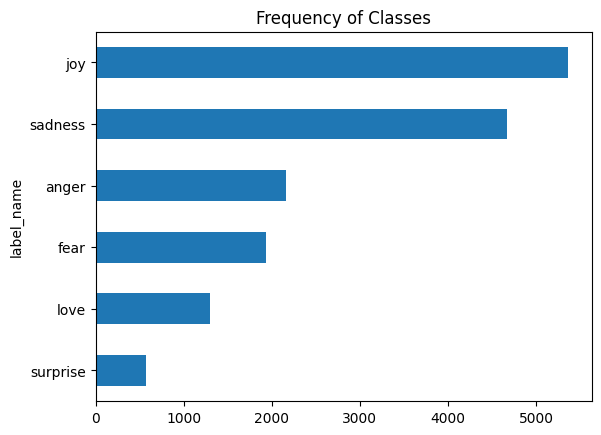

In [18]:
import matplotlib.pyplot as plt

df["label_name"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

<div class="alert alert-block alert-success">

<font size = 4> **How Long Are Our Tweets?**


<font size = 4>
- Transformer models come with a maximum input sequence length known as the "maximum context size." <br>
- When working with DistilBERT, the maximum context size is set at 512 tokens, equivalent to a few paragraphs of text.<br>
- In the upcoming section, we'll delve into tokens, considering them as atomic text pieces for now, treated as individual words. <br>
- To estimate tweet lengths per emotion, we can examine the distribution of words per tweet.<br>

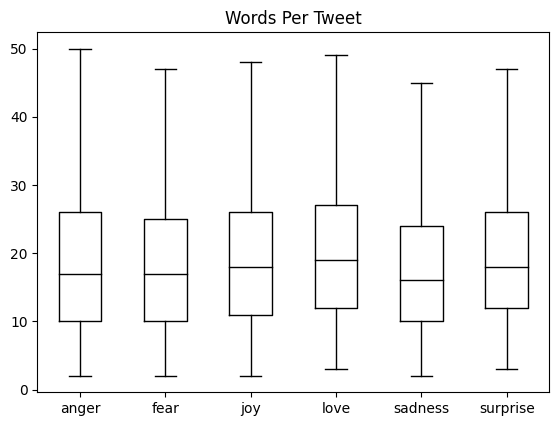

In [19]:
df["Words Per Tweet"] = df["text"].str.split().apply(len)
df.boxplot("Words Per Tweet", by="label_name", grid=False, showfliers=False,
           color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

<div class="alert alert-block alert-info">
<font size = 4>
    
- The plot reveals that, for each emotion, the majority of tweets are approximately 15 words in length, well within DistilBERT's maximum context size.
- Texts exceeding a model's context size require truncation, potentially compromising performance if vital information is lost.
- Fortunately, based on this observation, it seems that won't be a concern in this scenario.

<div class="alert alert-block alert-success">
    
<font size = 4> <b> <center> Converting these raw texts into a format suitable for Transformers! </b>
<font size = 4> <center> Also reset the output format of the dataset since the `DataFrame` format is not needed anymore.

In [20]:
emotions.reset_format()

<font size = 5 color = 'seagreen'><b>Text to Tokens</b>

<div class="alert alert-block alert-success">

<font size = 4>
- Transformer models such as DistilBERT don't accept raw strings as input.<br>
- Instead, they expect text to be tokenized and encoded as numerical vectors. <br>
- Tokenization involves breaking down a string into the atomic units used by the model. <br>
- Various tokenization strategies exist, with the optimal splitting of words into subunits typically learned from the corpus. <br>

    
<center> <b>Before examining DistilBERT's tokenizer, let's explore two extreme cases: character and word tokenization.</b>

<font size = 5 color = 'seagreen'> **Character Tokenization**

<div class="alert alert-block alert-success">  
<font size = 4>
    
- The simplest tokenization scheme is to feed each character individually to the model. <br>
- In Python, `str` objects are really arrays under the hood, which allows us to quickly implement character-level tokenization with just one line of code:

In [21]:
text = "Tokenizing text is a core task of NLP."
tokenized_text = list(text)
print(tokenized_text)

['T', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ', 'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o', 'f', ' ', 'N', 'L', 'P', '.']


<div class="alert alert-block alert-info">
    <font size =4> <b><center>This is a good start, but its not done yet. </b>
</div>

<div class="alert alert-block alert-success">
<font size =4>
    
- The model expects each character to be  converted to an integer, a process sometimes called `_numericalization_`.
- One simple way to do this is by encoding each unique token (which are characters in this case) with a unique integer:

In [22]:
token2idx = {ch: idx for idx, ch in enumerate(sorted(set(tokenized_text)))}
print(token2idx)

{' ': 0, '.': 1, 'L': 2, 'N': 3, 'P': 4, 'T': 5, 'a': 6, 'c': 7, 'e': 8, 'f': 9, 'g': 10, 'i': 11, 'k': 12, 'n': 13, 'o': 14, 'r': 15, 's': 16, 't': 17, 'x': 18, 'z': 19}


<div class="alert alert-block alert-success">
<font size = 4>
    
- This gives us a mapping from each character in our vocabulary to a unique integer.
- Use `token2idx` to transform the tokenized text to a list of integers:

In [23]:
input_ids = [token2idx[token] for token in tokenized_text]
print(input_ids)

[5, 14, 12, 8, 13, 11, 19, 11, 13, 10, 0, 17, 8, 18, 17, 0, 11, 16, 0, 6, 0, 7, 14, 15, 8, 0, 17, 6, 16, 12, 0, 14, 9, 0, 3, 2, 4, 1]


<div class="alert alert-block alert-success">
<font size =4>
    
- Each token has now been mapped to a unique numerical identifier (hence the name `input_ids`).
- The last step is to convert `input_ids` to a 2D tensor of one-hot vectors.
- One-hot vectors are frequently used in machine learning to encode categorical data, which can be either ordinal or nominal.

    For example, suppose we wanted to encode the names of characters in the _Transformers_ TV series. One way to do this would be to map each name to a unique ID, as follows:

In [24]:
categorical_df = pd.DataFrame(
    {"Name": ["Bumblebee", "Optimus Prime", "Megatron"], "Label ID": [0,1,2]})
categorical_df

,Name,Label ID
0,Bumblebee,0
1,Optimus Prime,1
2,Megatron,2


<div class="alert alert-block alert-info">
<font size = 4>    
    
- The problem with this approach is that it creates a fictitious ordering between the names, and neural networks are _really_ good at learning these kinds of relationships.
- So instead, we can create a new column for each category and assign a 1 where the category is true, and a 0 otherwise.
- In Pandas, this can be implemented with the `get_dummies()` function as follows:

In [25]:
pd.get_dummies(categorical_df["Name"])

,Bumblebee,Megatron,Optimus Prime
0,True,False,False
1,False,False,True
2,False,True,False


<div class="alert alert-block alert-success">
<font size = 4>

- The rows of this `DataFrame` are the one-hot vectors, which have a single "hot" entry with a 1 and 0s everywhere else.
- Now, looking at the `input_ids`, there is a similar problem:
>* The elements create an ordinal scale.
>* This means that adding or subtracting two IDs is a meaningless operation, since the result is a new ID that represents another random token.

- On the other hand, the result of adding two one-hot encodings can easily be interpreted:
> * The two entries that are "hot" indicate that the corresponding tokens co-occur.
> * Create the one-hot encodings in PyTorch by converting `input_ids` to a tensor and applying the `one_hot()` function as follows:

In [26]:
import torch
import torch.nn.functional as F

input_ids = torch.tensor(input_ids)
one_hot_encodings = F.one_hot(input_ids, num_classes=len(token2idx))
one_hot_encodings.shape

torch.Size([38, 20])

<div class="alert alert-block alert-success">
    
<font size=4> **For each of the 38 input tokens we now have a one-hot vector with 20 dimensions, since our vocabulary consists of 20 unique characters.**

<div class="alert alert-block alert-warning">
<font size =4>
    
> **Warning**:
    
> - It's important to always set `num_classes` in the `one_hot()` function.
> - This is because otherwise the one-hot vectors may end up being shorter than the length of the vocabulary (and need to be padded with zeros manually).
> - In TensorFlow, the equivalent function is `tf.one_hot()`, where the `depth` argument plays the role of `num_classes`.

<div class="alert alert-block alert-success">
<font size = 4>
    
**By examining the first vector, we can verify that a 1 appears in the location indicated by `input_ids[0]`:**
</div>

In [27]:
print(f"Token: {tokenized_text[0]}")
print(f"Tensor index: {input_ids[0]}")
print(f"One-hot: {one_hot_encodings[0]}")

Token: T
Tensor index: 5
One-hot: tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


<div class="alert alert-block alert-success">
<font size =4>
    
- From the simple example we can see that character-level tokenization ignores any structure in the text and treats the whole string as a stream of characters.
- Although this helps deal with misspellings and rare words, the main drawback is that linguistic structures such as words need to be _learned_ from the data.
- This requires significant compute, memory, and data.
    <center> <b>For this reason, character tokenization is rarely used in practice. </b>
- Instead, some structure of the text is preserved during the tokenization step.
- `_Word tokenization_` is a straightforward approach to achieve this, so let's take a look at how it works.
</div>

<font size = 5 color = 'seagreen'> **Word Tokenization**

<div class="alert alert-block alert-success">  
<font size = 4>
  
- Instead of splitting the text into characters, we can split it into words and map each word to an integer.
- Using words from the outset enables the model to skip the step of learning words from characters, and thereby reduces the complexity of the training process.

<div class="alert alert-block alert-success">  
<font size = 4>
    
- One simple class of word tokenizers uses whitespace to tokenize the text.
- This can be done by applying Python's `split()` function directly on the raw text (just like we did to measure the tweet lengths):

In [28]:
tokenized_text = text.split()
print(tokenized_text)

['Tokenizing', 'text', 'is', 'a', 'core', 'task', 'of', 'NLP.']


<div class="alert alert-block alert-success">  
<font size = 4>
    
- Take the same steps we took for the character tokenizer to map each word to an ID.
- However, we can already see one potential problem with this tokenization scheme:
> **Punctuation is not accounted for, so `NLP.` is treated as a single token.**

<center><b>Given that words can include declinations, conjugations, or misspellings, the size of the vocabulary can easily grow into the millions!</b>

<div class="alert alert-block alert-info">  
<font size = 4>
    
<b>Note</b>:
    <font size = 4>
        
> - Some word tokenizers have extra rules for punctuation. <br>
> - One can also apply stemming or lemmatization, which normalizes words to their stem.<br>
> - For e.g. "great", "greater", and "greatest" all become "great".<br>
> - This normalization comes at the expense of losing some information in the text.

<div class="alert alert-block alert-success">  
<font size = 4>
    
- Having a large vocabulary is a problem because it requires neural networks to have an enormous number of parameters.
- To illustrate this, suppose we have 1 million unique words and want to compress the 1-million-dimensional input vectors to 1-thousand-dimensional vectors in the first layer of our neural network.
- This is a standard step in most NLP architectures, and the resulting weight matrix of this first layer would contain 1 million $\times$ 1 thousand = 1 billion weights.
- This is already comparable to the largest GPT-2 model, which has around 1.5 billion parameters in total!

<div class="alert alert-block alert-success">  
<font size = 4>
    
- The goal is to reduce model parameter waste, given the high training cost and increased maintenance complexity associated with larger models.

- A common strategy involves restricting the vocabulary to, for instance, the top 100,000 words in the corpus, discarding rare words.

- Words outside the vocabulary are labeled as "unknown" and mapped to a shared UNK token.

- This results in the loss of potentially valuable information during word tokenization, as the model lacks information about words associated with UNK.

Isn't it desirable to find a middle ground between character and word tokenization that preserves both input information and structure? Enter: subword tokenization.

<font size = 5 color = 'seagreen'> **Subword Tokenization**

<div class="alert alert-block alert-success">  
<font size = 4>

- Subword tokenization combines the strengths of character and word tokenization.
>- It breaks down rare words into smaller units for handling complexity and misspellings.
>- It retains frequent words as distinct entities to manage input length effectively.
>- The process of subword tokenization is learned from the pretraining corpus.
>- It involves a combination of statistical rules and algorithms.

<div class="alert alert-block alert-success">  
<font size = 4>
    
**Various subword tokenization algorithms are commonly used in NLP.**
>- One example is WordPiece, utilized by BERT and DistilBERT tokenizers.
>- Transformers offers a convenient `AutoTokenizer` class for quick loading of tokenizers.
>- The `from_pretrained()` method, specifying the model ID, facilitates easy loading.
>- DistilBERT's tokenizer can be loaded effortlessly using these methods.

In [29]:
# hide_output
from transformers import AutoTokenizer

model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


<div class="alert alert-block alert-success">  
<font size = 4>
    
- The `AutoTokenizer` class is part of a broader collection of "auto" classes.
- Its purpose is automatic retrieval of the model's configuration, pre-trained weights, or vocabulary based on the checkpoint's name.
- This feature facilitates swift switching between models.
- If desired, manual loading of the specific class is also possible.
- For instance, the DistilBERT tokenizer can be loaded manually using a the following method.

```python

```

In [30]:
from transformers import DistilBertTokenizer

distilbert_tokenizer = DistilBertTokenizer.from_pretrained(model_ckpt)

<div class="alert alert-block alert-info">  
<font size = 4>

**Note:**
> - When the method `AutoTokenizer.from_pretrained()` is run for the first time a progress bar can be seen.
> - It shows which parameters of the pretrained tokenizer are loaded from the Hugging Face Hub.
> - When the code is executed a second time, it will load the tokenizer from the cache, usually located at _~/.cache/huggingface/_.

<font size = 5 color = 'seagreen'> <center> <b>Let's examine how this tokenizer works by feeding it our simple "Tokenizing text is a core task of NLP." example text:</b>

In [31]:
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


<div class="alert alert-block alert-success">  
<font size = 4>
    
- Just like with the character tokenization, it can be seen that the words have been mapped to unique integers in the `input_ids` field.
- The role of the `attention_mask` field will be discussed in the next section.

Now that the `input_ids` are there, they can be converted back into tokens by using the tokenizer's `convert_ids_to_tokens()` method:

In [32]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '.', '[SEP]']


<div class="alert alert-block alert-info">  
<font size = 4>

<b>Observations: </b>
     
> 1. Some special `[CLS]` and `[SEP]` tokens have been added to the start and end of the sequence. <br>
    - These tokens differ from model to model, but their main role is to indicate the start and end of a sequence.

> 2. The tokens have each been lowercased, which is a feature of this particular checkpoint.

> 3. Finally, we can see that "tokenizing" and "NLP" have been split into two tokens, which makes sense since they are not common words.
    - The `##` prefix in `##izing` and `##p` means that the preceding string is not whitespace; any token with this prefix should be merged with the previous token when you convert the tokens back to a string.
    

<font size = 5 color = 'seagreen'> <b>The `AutoTokenizer` class has a `convert_tokens_to_string()` method for doing just that, so let's apply it to our tokens:</b>

In [33]:
print(tokenizer.convert_tokens_to_string(tokens))

[CLS] tokenizing text is a core task of nlp. [SEP]


<font size = 5 color = 'seagreen'> **The `AutoTokenizer` class also has several attributes that provide information about the tokenizer.**<br>
<font size = 5 color = 'seagreen'> **For example, we can inspect the vocabulary size:**

In [34]:
tokenizer.vocab_size

30522

<font size = 5 color = 'seagreen'> **and the corresponding model's maximum context size:**

In [35]:
tokenizer.model_max_length

512

<font size = 5 color = 'seagreen'> **Another interesting attribute to know about is the names of the fields that the model expects in its forward pass:**

In [36]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

<div class="alert alert-block alert-info">  
<font size = 4> <b>Now that we have a basic understanding of the tokenization process for a single string, let's see how we can tokenize the whole dataset!</b>

<div class="alert alert-block alert-warning">  
<font size =4>

**Warning**:
    
>- When using pre-trained models, it is _really_ important to make sure that you use the same tokenizer that the model was trained with. <br>
>- From the model's perspective, switching the tokenizer is like shuffling the vocabulary. <br>
>- If everyone started swapping random words like "house" for "cat," it will be very hard to understand what was going on too!<br>

<font size = 5 color = 'seagreen'> **Tokenizing the Whole Dataset**

<div class="alert alert-block alert-success">  
<font size =4>
    
- To tokenize the whole corpus, the `map()` method of the `DatasetDict` object can be used.

- To get started, the first thing we need is a processing function to tokenize our examples with:

In [37]:
def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

<div class="alert alert-block alert-success">  
<font size = 4>
    
- This function applies the tokenizer to a batch of examples;
- `padding=True` will pad the examples with zeros to the size of the longest one in a batch, and `truncation=True` will truncate the examples to the model's maximum context size.
- To see `tokenize()` in action, pass a batch of two examples from the training set:

In [38]:
print(tokenize(emotions["train"][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


<div class="alert alert-block alert-info">  
<font size = 4>
    
**The consequence of padding can be observed here.**
>- The initial element of input_ids is shorter than the second.
>- Zeros have been appended to the first element to equalize their lengths.
>- These zeros correspond to the `[PAD]` token in the vocabulary.
>- The set of special tokens encompasses not only [PAD] but also includes `[CLS]` and `[SEP]`, as introduced earlier.

In [39]:
#hide_input
tokens2ids = list(zip(tokenizer.all_special_tokens, tokenizer.all_special_ids))
data = sorted(tokens2ids, key=lambda x : x[-1])
df = pd.DataFrame(data, columns=["Special Token", "Special Token ID"])
df.T

,0,1,2,3,4
Special Token,[PAD],[UNK],[CLS],[SEP],[MASK]
Special Token ID,0,100,101,102,103


<div class="alert alert-block alert-success">  
<font size = 4>
    
- The tokenizer, in addition to returning encoded tweets as input_ids, provides a list of attention_mask arrays.
- This inclusion is aimed at preventing model confusion caused by extra padding tokens.
- The purpose of the attention mask is to guide the model in ignoring the padded segments of the input.
- For a visual explanation of the padding of input IDs and attention masks, refer to the diagram labeled <<attention-mask>>.
</div>
<center> <img alt="attention-mask" src="https://drive.google.com/uc?export=view&id=1p0r4gtzs_Ecj_Qtg4iu8eyu35QNxOZE2" id="attention-mask" width = 900>

<div class="alert alert-block alert-success">  
<font size = 4>
    
**For each batch, the input sequences are padded to the maximum sequence length in the batch; the attention mask is used in the model to ignore the padded areas of the input tensors**
</div>

<div class="alert alert-block alert-success">  
<font size = 4>

**Once we've defined a processing function, we can apply it across all the splits in the corpus in a single line of code:**

In [40]:
# hide_output
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

<div class="alert alert-block alert-info">  
<font size = 4>

- By default, the `map()` method processes each example in the corpus individually.
- Setting `batched=True` in the `map()` method allows encoding tweets in batches.
- With `batch_size=None`, the `tokenize()` function is applied to the entire dataset as a single batch.
- This ensures uniform shapes for input tensors and attention masks across the entire dataset.
- The operation adds new `input_ids` and `attention_mask` columns to the dataset.

</div>

In [41]:
print(emotions_encoded["train"].column_names)

['text', 'label', 'input_ids', 'attention_mask']


[top](#p0)

<a id ="p4">
<font size = 10 color = 'midnightblue'>
    
**Training a text classifier**

<div class="alert alert-block alert-success">  
<font size = 4>

- As previously mentioned, models such as DistilBERT are pre-trained to predict masked words in a text sequence.
- However, direct use of these language models for text classification requires some modifications.
- To grasp the necessary modifications, let's examine the architecture of an encoder-based model like DistilBERT.
- The architecture depiction will help us understand the adjustments needed for text classification.
    
</div>

<center> <img alt="encoder-classifier" src="https://drive.google.com/uc?export=view&id=14MZpmcbPCnJvDGYn9e_Bzw4HPq8Axrdn" width = 700 height = 800 >

<div class="alert alert-block alert-success">  
<font size = 4>
    
- Initial step involves tokenization of text, generating one-hot vectors known as token encodings.
- The dimension of token encodings is determined by the tokenizer vocabulary, typically ranging from 20k to 200k unique tokens.
- Subsequently, these token encodings transform into token embeddings, residing in a lower-dimensional space.
- The token embeddings then undergo processing through encoder block layers, resulting in a hidden state for each input token.
- In language modeling pre-training, such as in DistilBERT, the hidden states are used to predict masked input tokens through a dedicated layer.
- In the context of a classification task, the language modeling layer is substituted with a classification layer.


<div class="alert alert-block alert-info">  
<font size = 4>

**Note:**
> - In practical implementation, PyTorch omits the creation of one-hot vectors for token encodings.
> - This is because multiplying a matrix by a one-hot vector is equivalent to selecting a column from the matrix.
> - The direct method involves retrieving the column with the token ID from the matrix.

<div class="alert alert-block alert-success">  
<font size = 4>
    
The model can be trained on the Twitter dataset using two approaches:

- Feature extraction: Utilizing the hidden states as features, we train a classifier without altering the pre-trained model.
- Fine-tuning: Training the entire model end-to-end, updating parameters of the pre-trained model in the process.
</div>






[top](#p0)

##### <a id = 'p4.1'>
###### <font size = 6 color = 'pwdrblue'> **Feature extraction**

<font size =5 color = 'seagreen'> **Transformer as a feature extractor**

<div class="alert alert-block alert-success">  
<font size = 4>
    
- Employing a transformer as a feature extractor is straightforward.
- During training, we keep the body's weights frozen and utilize the hidden states as features for the classifier.
- This approach offers the benefit of swift training for a compact or shallow model.
- The model could be a neural classification layer or a gradient-independent method like a random forest.
- This method proves particularly advantageous in the absence of GPUs, as the hidden states require pre-computation only once.
    </div>

## <center> <img src="https://drive.google.com/uc?export=view&id=14itYn1bhOflvKCfErUk5bzMkTsWRPknT" width = 800>
    
<font size = 3> <center> **The feature-based approach involves freezing the DistilBERT model, utilizing it solely to generate features for a classifier.**

<font size =5 color = 'seagreen'> **Using pretrained models**

<div class="alert alert-block alert-success">  
<font size = 4>

- Another convenient auto class from Transformers, known as `AutoModel`, will be utilized.
- Similar to the AutoTokenizer class, the `from_pretrained()` method is available in `AutoModel` for loading the weights of a pre-trained model.
- This method will be employed to load the DistilBERT checkpoint.

In [42]:
# hide_output
from transformers import AutoModel

model_ckpt = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

<div class="alert alert-block alert-success">  
<font size = 4>
    
- Using PyTorch, the availability of a GPU is verified.
- The PyTorch `nn.Module.to()` method is sequentially applied to the model loader.
- This guarantees the model's execution on the GPU if available.
- If a GPU is not present, the model automatically runs on the CPU, albeit with potentially slower performance.
    
</div>

<div class="alert alert-block alert-success">  
<font size = 4>
    
The `AutoModel` class converts the token encodings to embeddings, and then feeds them through the encoder stack to return the hidden states.


<center><b>Let's take a look at how we can extract these states from our corpus.</b>

<div class="alert alert-block alert-info">
<font size = 5>
<b>Bonus learning </b>
</div>
<font size =5 color = 'seagreen'> <b>Interoperability Between Frameworks<b>

<div class="alert alert-block alert-success">
<font size = 4>

- Transformers is designed for seamless interoperability with TensorFlow and JAX.
- Minimal code adjustments are necessary to load a pre-trained model in your preferred deep learning framework.
- For instance, loading DistilBERT in TensorFlow can be achieved by utilizing the `TFAutoModel` class with just a few lines of code.

In [43]:
#hide_output
from transformers import TFAutoModel

tf_model = TFAutoModel.from_pretrained(model_ckpt)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.bias']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


<div class="alert alert-block alert-success">
<font size = 4>

- This interoperability proves exceptionally valuable when a model is exclusively available in one framework, but there's a desire to use it in another.
- For instance,  the [XLM-RoBERTa model](https://huggingface.co/xlm-roberta-base) only comes with PyTorch weights.
- However, if an attempt is made to load it in TensorFlow as below:

>```python
>tf_xlmr = TFAutoModel.from_pretrained("xlm-roberta-base")
>```
<center> <b>an error will occur.</b></center>

- To address such cases, you can include a `from_pt=True` argument in the `TfAutoModel.from_pretrained()` function, allowing the library to automatically download and convert the PyTorch weights for seamless use.

In [44]:
tf_xlmr = TFAutoModel.from_pretrained("xlm-roberta-base", from_pt=True)

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFXLMRobertaModel: ['lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing TFXLMRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFXLMRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFXLMRobertaModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFXLMRobertaModel for predictions without further training.


<div class="alert alert-block alert-success">
<font size = 4>
    
- The ease of switching between frameworks in Transformers is evident.
- In most instances, obtaining equivalent TensorFlow 2.0 classes is as simple as adding a "TF" prefix to the classes.
- When utilizing the "pt" string (e.g., in the following section) as a shorthand for PyTorch, it can be effortlessly substituted with "tf," denoting TensorFlow.

<div class="alert alert-block alert-info">
<font size = 5>
<b>Bonus learning ends</b>
</div>

[top](#p0)

##### <a id = 'p4.2'>
###### <font size = 6 color = 'pwdrblue'> **Extracting the last hidden states**

<div class="alert alert-block alert-success">
<font size = 4>
    
- As a warm-up, the task is to retrieve the last hidden states for a single string.
- The process begins by encoding the string and converting the tokens into PyTorch tensors.
- This conversion is facilitated by providing the return_tensors="pt" argument to the tokenizer.
</div>

In [45]:
text = "this is a test"
inputs = tokenizer(text, return_tensors="pt")
print(f"Input tensor shape: {inputs['input_ids'].size()}")

Input tensor shape: torch.Size([1, 6])


<div class="alert alert-block alert-success">
<font size = 4>
    
- As observed, the shape of the resulting tensor is `[batch_size, n_tokens]`.
- With the encodings now in tensor form, the subsequent step involves placing them on the same device as the model.
- The inputs are then passed in the following manner.

In [46]:
inputs = {k:v.to(device) for k,v in inputs.items()}
with torch.no_grad():
    outputs = model(**inputs)
print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]],
       device='cuda:0'), hidden_states=None, attentions=None)


<div class="alert alert-block alert-success">
<font size = 4>

- In this instance, the `torch.no_grad()` context manager has been employed to deactivate automatic gradient calculation.
- This proves advantageous during inference, as it reduces the memory footprint of computations.
- Depending on the model configuration, the output may consist of various objects, such as hidden states, losses, or attentions, organized in a class structure akin to a `namedtuple` in Python.
- In our example, the model output takes the form of an instance of `BaseModelOutput`, with attributes accessible by name.
- As the current model yields only one attribute, specifically the last hidden state, let's examine its shape.

In [47]:
outputs.last_hidden_state.size()

torch.Size([1, 6, 768])

<div class="alert alert-block alert-success">
<font size = 4>
    
- Upon examining the hidden state tensor, it becomes evident that its shape is `[batch_size, n_tokens, hidden_dim]`.
- In simpler terms, a 768-dimensional vector is generated for each of the 6 input tokens.
- In classification tasks, it is customary to use the hidden state corresponding to the `[CLS]` token as the input feature.
- Given that this token consistently appears at the sequence's beginning, extraction can be accomplished by straightforwardly indexing into `outputs.last_hidden_state`.

In [48]:
outputs.last_hidden_state[:,0].size()

torch.Size([1, 768])

<div class="alert alert-block alert-success">
<font size = 4>
    
- Having acquired the knowledge of obtaining the last hidden state for a single string, the next step involves replicating the process for the entire dataset.
- This is achieved by establishing a new column, `hidden_state`, to store all these vectors.
- Similar to the approach employed with the tokenizer, the `map()` method of `DatasetDict` will be utilized to extract all hidden states simultaneously.
- The initial action involves encapsulating the preceding steps within a processing function.

In [49]:
def extract_hidden_states(batch):
    # Place model inputs on the GPU
    inputs = {k:v.to(device) for k,v in batch.items()
              if k in tokenizer.model_input_names}
    # Extract last hidden states
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state
    # Return vector for [CLS] token
    return {"hidden_state": last_hidden_state[:,0].cpu().numpy()}

<div class="alert alert-block alert-success">
<font size = 4>
    
- The function differs from our previous logic only in the final step, where the ultimate hidden state is reverted to the CPU as a NumPy array.
- It is crucial to note that when utilizing batched inputs with the`map()` method, the processing function must yield Python or NumPy objects.
- Considering the model's expectation of tensors as inputs, the following step involves converting the `input_ids` and `attention_mask` columns to the "torch" format.

In [50]:
emotions_encoded.set_format("torch",
                            columns=["input_ids", "attention_mask", "label"])

<font size = 5 color = 'seagreen'> **We can then go ahead and extract the hidden states across all splits in one go:**

In [51]:
#hide_output
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

<div class="alert alert-block alert-info">
<font size = 4>

**Note:**
    
- It's worth noting that in this instance, the `batch_size=None` was not specified; consequently, the default `batch_size=1000` is employed.
- As anticipated, the application of the `extract_hidden_states(``) function has introduced a new hidden_state column to our dataset:

In [52]:
emotions_hidden["train"].column_names

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

<div class="alert alert-block alert-success">
<font size = 4>

- Having acquired the hidden states corresponding to each tweet, the subsequent action involves training a classifier using these states.
- For this purpose, a feature matrix is essential; let's examine the process.

[top](#p0)

##### <a id = 'p4.3'>
###### <font size = 6 color = 'pwdrblue'> **Creating a feature matrix**

<div class="alert alert-block alert-success">
<font size = 4>

- All the requisite information for training a classifier is now present in the preprocessed dataset.
- The hidden states will serve as input features, and the labels will be utilized as targets.
- The corresponding arrays in the familiar Scikit-Learn format can be effortlessly generated, as depicted below:

In [53]:
import numpy as np

X_train = np.array(emotions_hidden["train"]["hidden_state"])
X_valid = np.array(emotions_hidden["validation"]["hidden_state"])
y_train = np.array(emotions_hidden["train"]["label"])
y_valid = np.array(emotions_hidden["validation"]["label"])
X_train.shape, X_valid.shape

((16000, 768), (2000, 768))

<div class="alert alert-block alert-info">
<font size = 4>

**Note:**
- Prior to training a model on the hidden states, it is advisable to conduct a sanity check to ascertain their effectiveness in representing the desired emotions for classification.
- The subsequent section will demonstrate how visualizing the features offers a swift method for accomplishing this verification.


[top](#p0)

##### <a id = 'p4.4'>
###### <font size = 6 color = 'pwdrblue'> **Visualizing the training set**

<div class="alert alert-block alert-success">
<font size = 4>
    
- Given the complexity of visualizing hidden states in 768 dimensions, we opt for the powerful UMAP algorithm to project the vectors into 2D.
- For optimal performance, UMAP$^*$ requires features scaled to the [0,1] interval, prompting the initial application of a `MinMaxScaler`.
- Subsequently, the UMAP implementation from the `umap-learn` library is utilized to reduce the dimensionality of the hidden states.

<div style='text-align: right;'><font size =2>  * Source : [L. McInnes, J. Healy, and J. Melville, ["UMAP: Uniform Manifold Approximation and Projection for Dimension Reduction"](https://arxiv.org/abs/1802.03426), (2018).]
</div>

In [55]:
!pip install umap-learn
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler

# Scale features to [0,1] range
X_scaled = MinMaxScaler().fit_transform(X_train)
# Initialize and fit UMAP
mapper = UMAP(n_components=2, metric="cosine").fit(X_scaled)
# Create a DataFrame of 2D embeddings
df_emb = pd.DataFrame(mapper.embedding_, columns=["X", "Y"])
df_emb["label"] = y_train
df_emb.head()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.2 MB/s eta 0:00:00


,X,Y,label
0,4.075857,6.633705,0
1,-3.331424,5.647471,0
2,5.051411,3.324029,3
3,-2.546844,3.575222,2
4,-3.600265,3.795730,3


<div class="alert alert-block alert-success">
<font size = 4>
    
- The outcome is an array with an equivalent number of training samples, now featuring only 2 features instead of the initial 768.
- Further exploration of the compressed data is warranted, including the plotting of point density for each category individually.

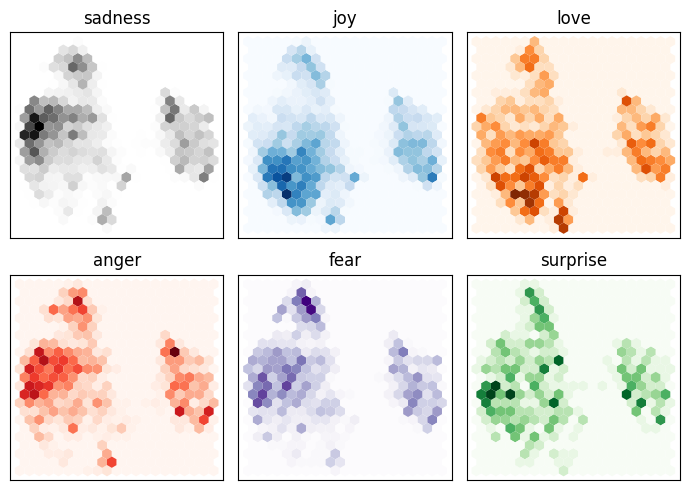

In [56]:
fig, axes = plt.subplots(2, 3, figsize=(7,5))
axes = axes.flatten()
cmaps = ["Greys", "Blues", "Oranges", "Reds", "Purples", "Greens"]
labels = emotions["train"].features["label"].names

for i, (label, cmap) in enumerate(zip(labels, cmaps)):
    df_emb_sub = df_emb.query(f"label == {i}")
    axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], cmap=cmap,
                   gridsize=20, linewidths=(0,))
    axes[i].set_title(label)
    axes[i].set_xticks([]), axes[i].set_yticks([])

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
<font size = 4>
    
**Note:**
- Projections onto a lower-dimensional space are solely represented.
- Overlapping in some categories does not imply their inseparability in the original space.
- Conversely, if separable in the projected space, they will also be separable in the original space.
</div>


<div class="alert alert-block alert-success">
<font size = 4>

- Clear patterns are observable in this plot:
>- Negative feelings like `sadness`, `anger`, and `fear` all inhabit analogous regions with slightly differing distributions.
>- In contrast, `joy` and `love` are distinctly separated from negative emotions and share a similar space.
>- `Surprise` is dispersed across various locations.
- The lack of guaranteed separation is evident, as the model was not explicitly trained to discern differences between these emotions.
- The model solely acquired implicit knowledge by predicting masked words in texts.
</div>


<font size = 5 color = 'seagreen'>
    
<center> <b>Now that we've gained some insight into the features of our dataset, let's finally train a model on it!</b>


[top](#p0)

##### <a id = 'p4.5'>
###### <font size = 6 color = 'pwdrblue'> <b>Training a simple classifier</b>

<div class="alert alert-block alert-success">
<font size =4>

- Differences in hidden states among emotions have been observed, though an evident boundary is absent for several.
- The hidden states will be employed for training a logistic regression model using Scikit-Learn.
- The training of this straightforward model is rapid and does not necessitate GPU utilization.

In [57]:
#hide_output
# We increase `max_iter` to guarantee convergence
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

In [58]:
lr_clf.score(X_valid, y_valid)

0.6335

<div class="alert alert-block alert-success">
<font size =4>
    
- Upon evaluating accuracy, it may seem that our model is marginally superior to random chance; however, considering the unbalanced nature of the multiclass dataset, it proves to be significantly better.
- To assess the model's performance, a comparison against a simple baseline is warranted.
- Scikit-Learn provides a DummyClassifier capable of constructing a classifier using straightforward heuristics like always selecting the majority class or consistently opting for a random class.
- In this scenario, the most effective heuristic involves consistently choosing the most frequent class, resulting in an accuracy of approximately 35%.

In [59]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_valid, y_valid)

0.352

<div class="alert alert-block alert-success">
<font size =4>
    
- The baseline is outperformed significantly by our uncomplicated classifier employing DistilBERT embeddings.
- A deeper understanding of the model's performance can be gained by examining the confusion matrix, revealing the association between true and predicted labels.

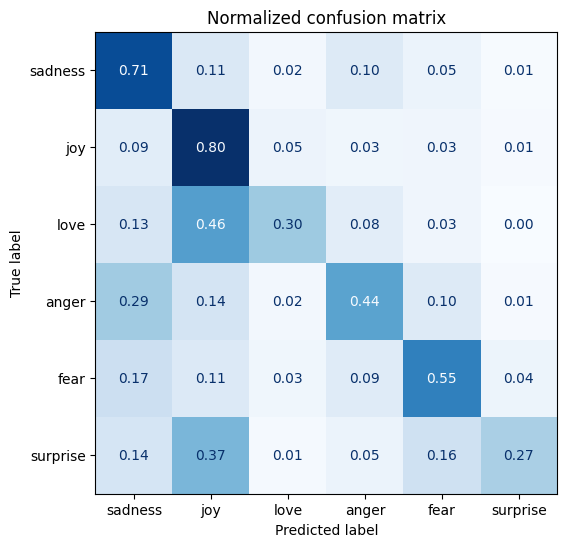

In [60]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

y_preds = lr_clf.predict(X_valid)
plot_confusion_matrix(y_preds, y_valid, labels)

<div class="alert alert-block alert-success">
<font size =4>
    
- `Sadness` is the label with which `anger` and `fear` are most frequently confused, aligning with the observation during embeddings visualization.
- `Joy` is commonly mistaken for both `love` and `surprise`.

<div class="alert alert-block alert-info">
<font size =4>
    
**Note:**
- The subsequent section will delve into the fine-tuning approach, known for yielding enhanced classification performance.
- It is crucial to acknowledge that executing this necessitates additional computational resources, such as GPUs, which may not be accessible within your organization.
- In such instances, a feature-based approach can serve as a viable compromise between traditional machine learning and deep learning.

[top](#p0)

#### <a id = 'p5'>
    
<font size = 10 color = 'midnightblue'> **Fine-Tuning Transformers**

<div class="alert alert-block alert-success">
<font size =4>
    
- The fine-tuning process for a transformer end-to-end will now be explored.
- In this approach, the hidden states experience training rather than being utilized as fixed features, as demonstrated below.
- A differentiable classification head is required, commonly attained by employing a neural network for classification.
    

<center> <img alt="encoder-tuning" src="https://drive.google.com/uc?export=view&id=14itYn1bhOflvKCfErUk5bzMkTsWRPknT" width = 800 height = 600>
<center> <font size = 3><b>In the fine-tuning approach, the entire DistilBERT model undergoes training alongside the classification head.<b>

<div class="alert alert-block alert-success">
<font size =4>
    
- Training the hidden states, which function as inputs to the classification model, helps mitigate the challenge of working with data potentially unsuitable for the classification task.
- During training, the initial hidden states adapt, leading to a reduction in model loss and a subsequent enhancement in performance.

- The Trainer API from Transformers will be utilized to streamline the training loop.
- The necessary components to establish this setup will be examined.

[top](#p0)

##### <a id = 'p6'>
<font size = 10 color = 'midnightblue'> **Loading a pretrained model**

<div class="alert alert-block alert-success">
<font size =4>
    
- The first requirement is a pre-trained `DistilBERT` model, akin to what was utilized in the feature-based approach.
- A minor adjustment is made by opting for the `AutoModelForSequenceClassification` model instead of `AutoModel`.
- The distinction lies in the fact that the `AutoModelForSequenceClassification` model features a classification head atop the pre-trained model outputs, facilitating straightforward training with the base model.
- Specification of the number of labels the model needs to predict (six in our case) is essential, as this determines the number of outputs the classification head should have.

In [61]:
# hide_output
from transformers import AutoModelForSequenceClassification

num_labels = 6
model = (AutoModelForSequenceClassification
         .from_pretrained(model_ckpt, num_labels=num_labels)
         .to(device))

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


<div class="alert alert-block alert-info">
<font size =4>
    
**Note:**
    
- A warning will be observed indicating that certain parts of the model are randomly initialized; this is standard procedure as the classification head is yet to undergo training.
- The subsequent task involves specifying the metrics that will be employed to assess the model's performance during the fine-tuning process.

##### <a id = 'p6.1'>
###### <font size = 6 color = 'pwdrblue'>**Defining the performance metrics**

<div class="alert alert-block alert-success">
<font size =4>
    
- To monitor metrics throughout training, a `compute_metrics()` function for the `Trainer` must be defined.
- This function receives an `EvalPrediction` object, a named tuple with `predictions` and `label_ids` attributes, and is required to return a dictionary associating each metric's name with its value.
- For our application, the computation of the model's $F_1$-score and accuracy will be executed as follows:

In [62]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

<div class="alert alert-block alert-success">
<font size =4>
    
With the dataset and metrics prepared, two final tasks need attention before defining the Trainer class:

>- Logging into our account on the Hugging Face Hub, facilitating the ability to push the fine-tuned model to our Hub account for community sharing.
>- Defining all the hyperparameters for the training run.
>- These steps will be addressed in the upcoming section.

[top](#p0)

##### <a id = 'p6.2'>
###### <font size = 6 color = 'pwdrblue'>**Training the model**

<div class="alert alert-block alert-info">
<font size =4>
    
If you're running this code in a Jupyter notebook, you can log in to the Hub with the following helper function:

In [63]:
from huggingface_hub import notebook_login

notebook_login()

<div class="alert alert-block alert-success">
<font size =4>
    
- A widget will be presented, allowing entry of the username and password or an access token with write privileges.

- Detailed information on creating access tokens can be found in the Hub documentation.

- For those working in the terminal, logging in can be accomplished by executing the following command:

```bash
$ huggingface-cli login
```

<div class="alert alert-block alert-success">
<font size =4>
    
- The `TrainingArguments` class is employed to articulate the training parameters.
- This class holds a wealth of information, affording fine-grained control over the training and evaluation process.
- The pivotal argument to specify is `output_dir`, serving as the storage location for all artifacts generated during training.
- An exemplar showcasing the comprehensive structure of `TrainingArguments` is as follows:

In [64]:
from transformers import Trainer, TrainingArguments

batch_size = 64
logging_steps = len(emotions_encoded["train"]) // batch_size
model_name = f"{model_ckpt}-finetuned-emotion"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  push_to_hub=True,
                                  log_level="error")

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


<div class="alert alert-block alert-success">
<font size =4>

- The batch size, learning rate, and number of epochs are configured here, and it is specified to load the best model upon completion of the training run.
- Incorporating this final ingredient, our model can be instantiated and fine-tuned using the Trainer.

In [65]:
from transformers import Trainer

trainer = Trainer(model=model, args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=emotions_encoded["train"],
                  eval_dataset=emotions_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train();

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.818600,0.313299,0.905000,0.904186
2,0.242200,0.214876,0.928500,0.928516


<div class="alert alert-block alert-success">
<font size =4>
    
- In the logs, an $F_1$-score of approximately 92% on the validation set is observed for our model, representing a substantial improvement compared to the feature-based approach.
- A more comprehensive analysis of the training metrics can be undertaken by computing the confusion matrix.
- To visualize the confusion matrix, obtaining predictions on the validation set is the initial requisite.
- The predict() method of the Trainer class furnishes several valuable objects suitable for evaluation.

In [67]:
# hide_output
preds_output = trainer.predict(emotions_encoded["validation"])

<div class="alert alert-block alert-success">
<font size =4>

- The result of the `predict()` method is a `PredictionOutput` object encompassing arrays of `predictions` and `label_ids`, in addition to the metrics provided to the trainer.
- Accessing the metrics on the validation set, for instance, can be achieved as follows:

In [68]:
preds_output.metrics

{'test_loss': 0.2148759365081787,
 'test_accuracy': 0.9285,
 'test_f1': 0.928516043303206,
 'test_runtime': 3.9405,
 'test_samples_per_second': 507.556,
 'test_steps_per_second': 8.121}

<div class="alert alert-block alert-success">
<font size =4>
    
- The `PredictionOutput` also includes the raw predictions for each class.
- Decoding the predictions greedily is accomplished using `np.argmax()`.
- This process produces the predicted labels, adopting the same format as the labels returned by the Scikit-Learn models in the feature-based approach.


In [69]:
y_preds = np.argmax(preds_output.predictions, axis=1)

<center><font size = 5 color = 'seagreen'> <b>With the predictions, we can plot the confusion matrix again:</b>

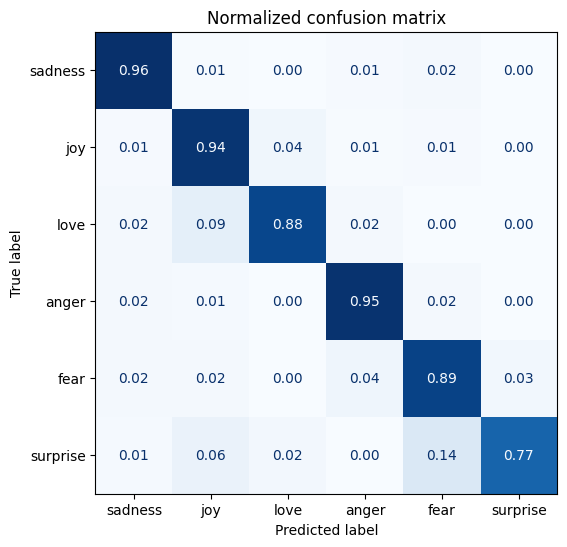

In [70]:
plot_confusion_matrix(y_preds, y_valid, labels)

<div class="alert alert-block alert-success">
<font size = 4>
    
- The confusion matrix is now much closer to the ideal diagonal setup.
- The **'love'** category still exhibits frequent confusion with **'joy'** which is expected.
- **'Surprise'** is often mistaken for **'joy'** and sometimes confused with **'fear'**.
- While the model's overall performance appears commendable, it's essential to delve deeper into the specific error types before concluding our assessment.

<div class="alert alert-block alert-info">
<font size = 5>
    <b>Bonus learning </b>

<font size = 5 color = 'seagreen'> **Fine-Tuning with Keras**

<div class="alert alert-block alert-success">
<font size = 4>
    
- When utilizing TensorFlow, it is feasible to fine-tune models using the Keras API.
- The primary distinction from the PyTorch API lies in the absence of a Trainer class, given that Keras models inherently incorporate a built-in fit() method.
- To comprehend this process, let's commence by loading DistilBERT as a TensorFlow model.

In [71]:
#hide_output
from transformers import TFAutoModelForSequenceClassification

tf_model = (TFAutoModelForSequenceClassification
            .from_pretrained(model_ckpt, num_labels=num_labels))

<div class="alert alert-block alert-success">
<font size = 4>
    
- Subsequently, our datasets will be transformed into the tf.data.Dataset format.
- Leveraging the fact that our tokenized inputs are already padded, this transformation can be effortlessly achieved by employing the to_tf_dataset() method on emotions_encoded.

In [72]:
# The column names to convert to TensorFlow tensors
tokenizer_columns = tokenizer.model_input_names

tf_train_dataset = emotions_encoded["train"].to_tf_dataset(
    columns=tokenizer_columns, label_cols=["label"], shuffle=True,
    batch_size=batch_size)
tf_eval_dataset = emotions_encoded["validation"].to_tf_dataset(
    columns=tokenizer_columns, label_cols=["label"], shuffle=False,
    batch_size=batch_size)

/usr/local/lib/python3.10/dist-packages/datasets/arrow_dataset.py:410: FutureWarning: The output of `to_tf_dataset` will change when a passing single element list for `labels` or `columns` in the next datasets version. To return a tuple structure rather than dict, pass a single string.
Old behaviour: columns=['a'], labels=['labels'] -> (tf.Tensor, tf.Tensor)  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor)  
New behaviour: columns=['a'],labels=['labels'] -> ({'a': tf.Tensor}, {'labels': tf.Tensor})  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor) 
  warnings.warn(


<div class="alert alert-block alert-success">
<font size = 4>

- Subsequently, our datasets will be transformed into the `tf.data.Dataset format`.
- Leveraging the fact that our tokenized inputs are already padded, this transformation can be effortlessly achieved by employing the `to_tf_dataset()` method on `emotions_encoded`.







In [73]:
#hide_output
import tensorflow as tf

tf_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=tf.metrics.SparseCategoricalAccuracy())

tf_model.fit(tf_train_dataset, validation_data=tf_eval_dataset, epochs=2)

Epoch 1/2
250/250 [==============================] - 156s 531ms/step - loss: 0.5286 - sparse_categorical_accuracy: 0.8153 - val_loss: 0.2018 - val_sparse_categorical_accuracy: 0.9245
Epoch 2/2
250/250 [==============================] - 135s 540ms/step - loss: 0.1428 - sparse_categorical_accuracy: 0.9389 - val_loss: 0.1316 - val_sparse_categorical_accuracy: 0.9415


<div class="alert alert-block alert-info">
<font size = 5>
    <b>Bonus learning ends </b>

[top](#p0)

##### <a id = 'p7'>
<font size = 10 color = 'midnightblue'>  **Error analysis**

<font size = 5 color = 'seagreen'>
    
<b><center> Before moving on, investigate the model's predictions a little bit further.</b>

<div class="alert alert-block alert-success">  
<font size = 4>
    
- A simple yet powerful technique is to sort the validation samples by the model loss.
- When the label are passed during the forward pass, the loss is automatically calculated and returned.

**Here's a function that returns the loss along with the predicted label:**

In [74]:
from torch.nn.functional import cross_entropy

def forward_pass_with_label(batch):
    # Place all input tensors on the same device as the model
    inputs = {k:v.to(device) for k,v in batch.items()
              if k in tokenizer.model_input_names}

    with torch.no_grad():
        output = model(**inputs)
        pred_label = torch.argmax(output.logits, axis=-1)
        loss = cross_entropy(output.logits, batch["label"].to(device),
                             reduction="none")

    # Place outputs on CPU for compatibility with other dataset columns
    return {"loss": loss.cpu().numpy(),
            "predicted_label": pred_label.cpu().numpy()}

<font size = 5 color = 'seagreen'> **Using the `map()` method once more, we can apply this function to get the losses for all the samples:**

In [75]:
#hide_output
# Convert our dataset back to PyTorch tensors
emotions_encoded.set_format("torch",
                            columns=["input_ids", "attention_mask", "label"])
# Compute loss values
emotions_encoded["validation"] = emotions_encoded["validation"].map(
    forward_pass_with_label, batched=True, batch_size=16)

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

<font size = 5 color = 'seagreen'> **Finally, we create a `DataFrame` with the texts, losses, and predicted/true labels:**

In [76]:
emotions_encoded.set_format("pandas")
cols = ["text", "label", "predicted_label", "loss"]
df_test = emotions_encoded["validation"][:][cols]
df_test["label"] = df_test["label"].apply(label_int2str)
df_test["predicted_label"] = (df_test["predicted_label"]
                              .apply(label_int2str))

<div class="alert alert-block alert-success">  
<font size = 4>
    
Now  `emotions_encoded` can be easily sorted by the losses in either ascending or descending order.

**The goal of this exercise is to detect one of the following:**
<font size = 4>
    
- _Wrong labels_: Every process that adds labels to data can be flawed. Annotators can make mistakes or disagree, while labels that are inferred from other features can be wrong. If it was easy to automatically annotate data, then we would not need a model to do it. Thus, it is normal that there are some wrongly labeled examples. With this approach, we can quickly find and correct them.

- _Quirks of the dataset_: Datasets in the real world are always a bit messy. When working with text, special characters or strings in the inputs can have a big impact on the model's predictions. Inspecting the model's weakest predictions can help identify such features, and cleaning the data or injecting similar examples can make the model more robust.

<font size = 5 color = 'seagreen'> **Let's first have a look at the data samples with the highest losses:**

In [77]:
#hide_output
df_test.sort_values("loss", ascending=False).head(10)

,text,label,predicted_label,loss
1963,i called myself pro life and voted for perry w...,joy,sadness,5.893188
882,i feel badly about reneging on my commitment t...,love,sadness,5.642454
1870,i guess i feel betrayed because i admired him ...,joy,sadness,5.622777
1950,i as representative of everything thats wrong ...,surprise,sadness,5.517415
1801,i feel that he was being overshadowed by the s...,love,sadness,5.460328
1274,i am going to several holiday parties and i ca...,joy,sadness,5.197452
318,i felt ashamed of these feelings and was scare...,fear,sadness,4.842029
1500,i guess we would naturally feel a sense of lon...,anger,sadness,4.619455
1964,i feel vaguely cheated and a little amused,joy,anger,4.617685
1111,im lazy my characters fall into categories of ...,joy,fear,4.529107


<div class="alert alert-block alert-success">  
<font size = 4>

- The model's predictions include clear instances of incorrect labels.
- Conversely, there are numerous examples without a distinct class, possibly indicating either mislabeling or the need for a new class.
- Notably, the label `joy` appears to be misapplied multiple times.
    
<center><b>With this information the dataset can be refined, which often can lead to as big a performance gain (or more) as having more data or larger models!</b>

<div class="alert alert-block alert-success">  
<font size = 4>

- Examining samples with the lowest losses reveals that the model displays heightened confidence when predicting the sadness class.
- Deep learning models excel at identifying and capitalizing on shortcuts to make predictions.
- Consequently, it is valuable to invest time in scrutinizing examples where the model exhibits high confidence.
- This ensures confidence that the model does not exploit specific text features improperly.
    > <center> <b>So, let's also look at the predictions with the smallest loss:</b>

In [78]:
#hide_output
df_test.sort_values("loss", ascending=True).head(10)

,text,label,predicted_label,loss
1452,i always feel guilty and come to one conclusio...,sadness,sadness,0.013617
697,i was missing him desperately and feeling idio...,sadness,sadness,0.013820
1310,i feel like an ungrateful asshole,sadness,sadness,0.013825
133,i and feel quite ungrateful for it but i m loo...,sadness,sadness,0.013903
1601,i feel so ungrateful when thinking saying thes...,sadness,sadness,0.013987
1466,i feel so ungrateful to be wishing this pregna...,sadness,sadness,0.014012
1531,i forgive stanley hes not so quick to forgive ...,sadness,sadness,0.014025
267,i feel like im alone in missing him and becaus...,sadness,sadness,0.014175
323,im starting to feel unwelcome in there,sadness,sadness,0.014251
1089,i could think was i wonder how many days i hav...,sadness,sadness,0.014276


<div class="alert alert-block alert-success">  
<font size = 4>
    
- The revelation that joy is occasionally mislabeled and the model exhibits heightened confidence in predicting the label sadness is now established.
- Armed with this insight, we can strategically enhance our dataset and monitor the class the model demonstrates high confidence in.
- Prior to deploying the trained model, the final step involves saving it for future utilization.
- Transformers provides a straightforward process for accomplishing this, as we'll elucidate in the upcoming section.

[top](#p0)

##### <a id = 'p7'>
<font size = 10 color = 'midnightblue'> **Saving and sharing the model**

<div class="alert alert-block alert-info">  
<font size = 4>

- The NLP community benefits greatly from sharing pretrained and fine-tuned models, and everybody can share their models with others via the Hugging Face Hub.
- Any community-generated model can be downloaded from the Hub just like we downloaded the DistilBERT model.
- With the `Trainer` API, saving and sharing a model is simple:

In [79]:
#hide_output
trainer.push_to_hub(commit_message="Training completed!")

events.out.tfevents.1725537217.95c5f05a57e9.2700.0:   0%|          | 0.00/6.64k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/JangidA/distilbert-base-uncased-finetuned-emotion/commit/8de64ce19fedd95be206ee712033f2eaa6881052', commit_message='Training completed!', commit_description='', oid='8de64ce19fedd95be206ee712033f2eaa6881052', pr_url=None, pr_revision=None, pr_num=None)

<div class="alert alert-block alert-success">  
<font size = 4>
    
- The fine-tuned model to make predictions on new tweets.
- Since we've pushed our model to the Hub, we can now use it with the `pipeline()` function, just like we did in <<chapter_introduction>>.
- First, let's load the pipeline:

In [80]:
#hide_output
from transformers import pipeline

# Change `transformersbook` to your Hub username
model_id = "transformersbook/distilbert-base-uncased-finetuned-emotion"
classifier = pipeline("text-classification", model=model_id)

config.json:   0%|          | 0.00/872 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/333 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


<font size = 5 color = 'seagreen'> **Then let's test the pipeline with a sample tweet:**

In [81]:
custom_tweet = "I saw a movie today and it was really good."
preds = classifier(custom_tweet, return_all_scores=True)

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


<div class="alert alert-block alert-success">  
<font size = 4>
<b>
Finally, we can plot the probability for each class in a bar plot. Clearly, the model estimates that the most likely class is `joy`, which appears to be reasonable given the tweet:

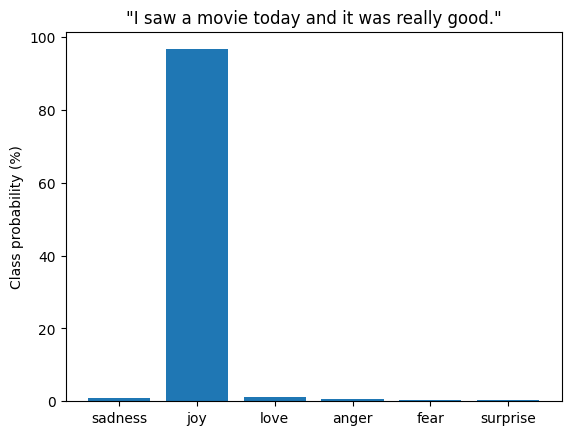

In [82]:
preds_df = pd.DataFrame(preds[0])
plt.bar(labels, 100 * preds_df["score"], color='C0')
plt.title(f'"{custom_tweet}"')
plt.ylabel("Class probability (%)")
plt.show()

[top](#p0)